Project: Machine Learning - Customer Segmentation using K-Means

Group Members:
 1. Alaknand Mishra
 2. Angelin Raison
 3. Elza Biju
 4. Sreekar Pula
 5. Sheltor Victor
 6. Snehal Bhagwate
 7. Srinidhi Swetha
 8. Surya S

First 5 rows of the data:
    Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-n

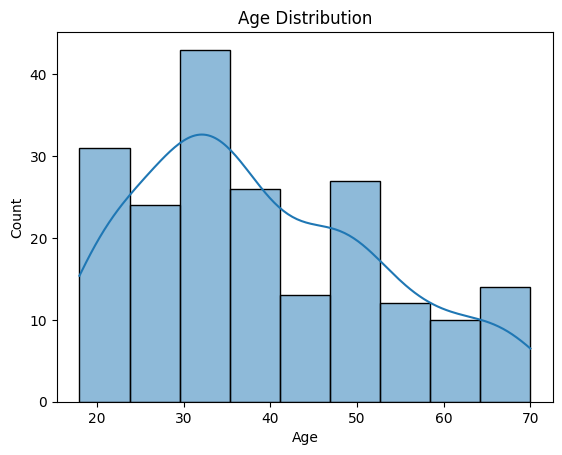

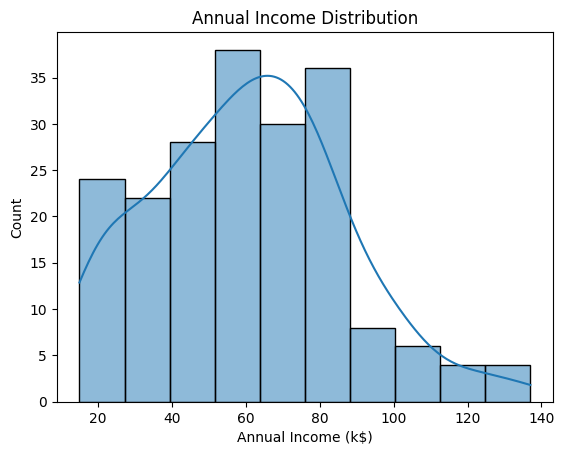

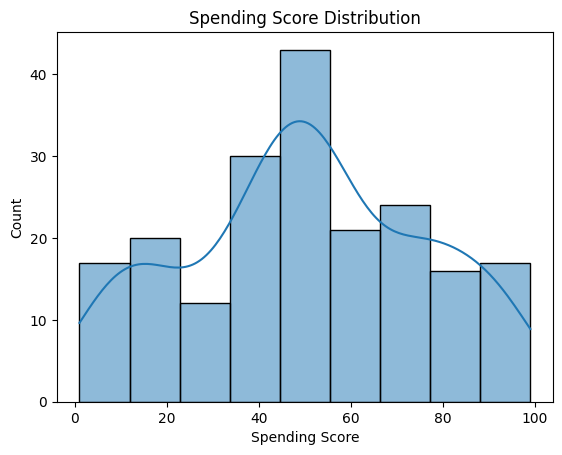


✅ Optimal number of clusters based on silhouette score: 5


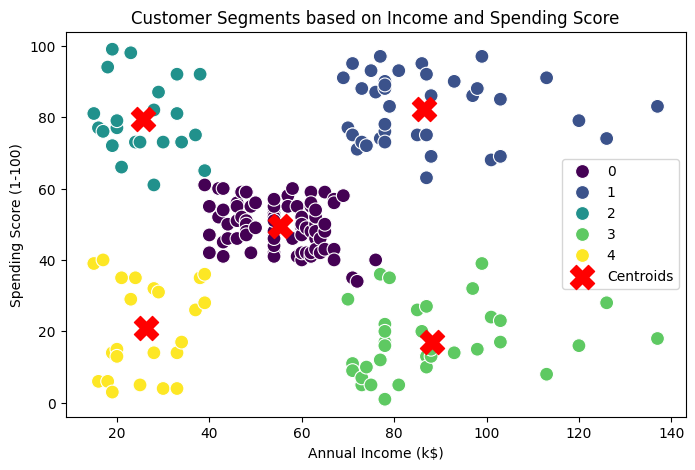


✅ Final Silhouette Score for clustering: 0.55

📊 Average values in each cluster:
          Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                  
0        42.7                55.3                    49.5
1        32.7                86.5                    82.1
2        25.3                25.7                    79.4
3        41.1                88.2                    17.1
4        45.2                26.3                    20.9


<Figure size 640x480 with 0 Axes>

In [ ]:
'''
Major Project

Title--Un Supervised Learning
Unsupervised learning is a type of machine learning where the algorithm is trained on unlabeled data.
This means the model tries to identify patterns, structures, and relationships in the data without any prior knowledge of the labels or outcomes
Your Task:
As Team you are going to work on Unsupervised learning.
We are giving open space to choose your model and dataset
you have to prepare the Abstract of your model and dataset

Group Members:
1. Alaknand Mishra
2. Angelin Raison
3. Elza Biju
4. Sreekar Pula
5. Sheltor Victor
6. Snehal Bhagwate
7. Srinidhi Swethaa
8. Surya S
'''
# Importing Required Libraries
import pandas as pd                       # For data handling
import numpy as np                        # For numerical operations
import matplotlib.pyplot as plt           # For plotting graphs
import seaborn as sns                     # For advanced visualizations
from sklearn.cluster import KMeans        # For KMeans clustering
from sklearn.metrics import silhouette_score  # To evaluate cluster quality

# Project & Team Intro
print("Project: Machine Learning - Customer Segmentation using K-Means\n")
print("Group Members:\n 1. Alaknand Mishra\n 2. Angelin Raison\n 3. Elza Biju\n 4. Sreekar Pula\n 5. Sheltor Victor\n 6. Snehal Bhagwate\n 7. Srinidhi Swetha\n 8. Surya S")

# Step 1: Load Dataset
df = pd.read_csv('/content/Mall_Customers.csv')  # Load CSV file
df = df.drop('CustomerID', axis=1)              # Drop the ID column as it is not useful for clustering

# Step 2: Convert 'Gender' into numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Step 3: Display Data Summary
print("\nFirst 5 rows of the data:\n", df.head())
print("\nData Types and Missing Values:\n", df.info())
print("\nStatistical Summary:\n", df.describe())

# Step 4: Plot Histograms of Features
# This helps in understanding the data distribution

sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

# Step 5: Select Features for Clustering
# We'll only use Income and Spending Score for this example
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Step 6: Find the Optimal Number of Clusters using Silhouette Score
silhouette_scores = []

# Try different k values from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Find best k with the highest silhouette score
best_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f"\n✅ Optimal number of clusters based on silhouette score: {best_k}")

# Step 7: Apply KMeans with Best k
#✅ It fixes the randomness so that every time you run the code, you get the same result.

# ❓ Why do we need it in KMeans?
 #Because KMeans randomly chooses starting points (initial cluster centers).
 # If you don’t set random_state, you may get different clusters every time you run the code.

#❓ Why 42?
#It’s just a commonly used number.
 #You can use any number like 0, 10, etc. The key is to keep it fixed.
 #random_state = 42  ✅ Always same output
#random_state = None ❌ Output may change every run

kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)  # Add new column to dataset

# Step 8: Visualize the Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='viridis', s=100)

# Mark cluster centers
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Step 9: Evaluate Final Cluster with Silhouette Score
final_score = silhouette_score(X, df['Cluster'])
print(f"\n✅ Final Silhouette Score for clustering: {final_score:.2f}")

# Step 10: Display Average Stats per Cluster
print("\n📊 Average values in each cluster:")
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1))

plt.savefig('customer_segments.png')
plt.savefig('age_distribution.png')

In [ ]:
'''
# Above o/p table summary----

# Cluster 0:
# Middle-aged (42.7 years)
# Medium income (~55k)
# Moderate spending score (~49.5)

# Cluster 1:
# Younger adults (32.7 years)
# High income (~86.5k)
# High spending (82.1) → likely big spenders

# Cluster 2:
# Youngest group (25.3 years)
# Low income (~25.7k)
# High spending (79.4) → young but spend a lot despite low income

# Cluster 3:
# Middle-aged (41.1 years)
# High income (~88.2k)
# Low spending (17.1) → wealthy but low spenders

# Cluster 4:
# Older group (45.2 years)
# Low income (~26.3k)
# Low spending (20.9) → older and spend less
'''

'\n# Above o/p table summary----\n\n# Cluster 0:\n# Middle-aged (42.7 years)\n# Medium income (~55k)\n# Moderate spending score (~49.5)\n\n# Cluster 1:\n# Younger adults (32.7 years)\n# High income (~86.5k)\n# High spending (82.1) → likely big spenders\n\n# Cluster 2:\n# Youngest group (25.3 years)\n# Low income (~25.7k)\n# High spending (79.4) → young but spend a lot despite low income\n\n# Cluster 3:\n# Middle-aged (41.1 years)\n# High income (~88.2k)\n# Low spending (17.1) → wealthy but low spenders\n\n# Cluster 4:\n# Older group (45.2 years)\n# Low income (~26.3k)\n# Low spending (20.9) → older and spend less\n'